-> Chargement des librairies et fonctions

// Ici je retest tout avec les 10 topic majoritaire par et le titre

In [1]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels import *

from Fonction.visualisation import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> Chargement des données brutes

In [23]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# Init_Alle = pd.read_csv('./Data_brut/data_allemand_all.csv', sep=",")
#
#
# data_brute = pd.concat([Init_train,Init_test,Init_Alle], ignore_index = True)
#
# for i in range(0,len(data_brute['our rating'])):
#  if data_brute['our rating'][i] == 'Other':
#      data_brute['our rating'][i] = 'other'
#
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
#
# data_equilibre = balanceSample(data_brute,210,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint2.csv', sep=',', index=False)

mySample = pd.read_csv('./Data_equilibre/MyData_Sprint2.csv', sep=",")
mySample= extractTopic(mySample)
print(mySample['our rating'].value_counts())
#display(mySample.head())

mySample = mySample.dropna(subset=['title'])

X_train = mySample['topic']+mySample['title']
y_train = mySample['our rating']

C:\Users\mathi\M1_ICO\S2\MACHINE_LEARNING_1\Projet\MonProjet\Fonction\myFonction.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mySample['topic'][topic_idx] = " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])


false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64
public_id     311
text            0
title           9
our rating      0
ID            529
Unnamed: 0    776
topic           0
dtype: int64
public_id     311
text            0
title           0
our rating      0
ID            520
Unnamed: 0    767
topic           0
dtype: int64


In [27]:
from tabulate import tabulate
from sklearn.feature_extraction.text import CountVectorizer

CV_brut = Pipeline([('cleaner', TextNormalizer()),
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('svm', SVC())])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                  getstemmer=False,removedigit=False)),
                       ('count_vectorizer', CountVectorizer(lowercase=False)),
                       ('svm', SVC())])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                  getstemmer=False,removedigit=False)),
                       ('count_vectorizer', CountVectorizer(lowercase=False)),
                       ('svm', SVC())])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                      getstemmer=True,removedigit=False)),
                           ('count_vectorizer', CountVectorizer(lowercase=False)),
                           ('svm', SVC())])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()),
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                        ('svm', SVC())])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                     getstemmer=False,removedigit=False)),
                          ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                          ('svm', SVC())])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                     getstemmer=False,removedigit=False)),
                          ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                          ('svm', SVC())])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                         getstemmer=True,removedigit=False)),
                              ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                              ("svm", SVC())])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]


# Evaluation des differents pipelines
print ("Evaluation des différentes configurations : ")
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=5).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])


print (tabulate(scores, floatfmt='.4f', headers=('Pipeline', 'Score')))

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_lowcase       0.5224
TFIDF_lowStop       0.5152
TFIDF_brut          0.5139
TFIDF_lowStopstem   0.5091
CV_lowStop          0.4188
CV_lowStopstem      0.4188
CV_brut             0.3947
CV_lowcase          0.3935


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.483 (0.039) in 1.734 s
Evaluation de  LR
LR : 0.526 (0.059) in 32.797 s
Evaluation de  KNN
KNN : 0.404 (0.062) in 2.505 s
Evaluation de  CART
CART : 0.413 (0.054) in 21.674 s
Evaluation de  RF
RF : 0.511 (0.039) in 23.489 s
Evaluation de  SVM
SVM : 0.556 (0.062) in 808.930 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.556  (0.062)  en 808.930   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.556  (0.062)  en 808.930   s
Classifier :  LR  accuracy : 0.526  (0.059)  en 32.797   s
Classifier :  RF  accuracy : 0.511  (0.039)  en 23.489   s
Classifier :  MultinomialNB  accuracy : 0.483  (0.039)  en 1.734   s
Classifier :  CART  accuracy : 0.413  (0.054)  en 21.674   s
Classifier :  KNN  accuracy : 0.404  (0.062)  en 2.505   s


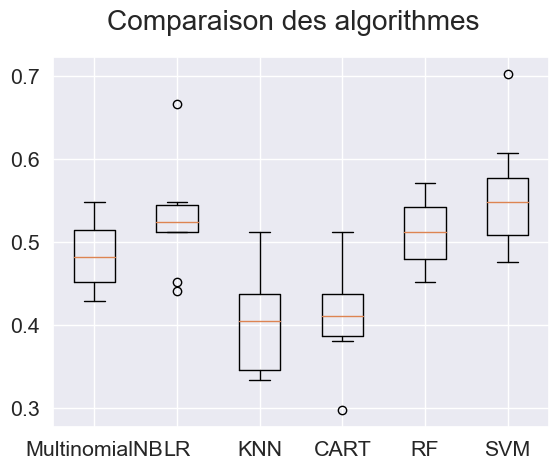

In [10]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [24]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['tfidf', 'svm']
parameters :
{'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  163.536 s
Meilleur résultat : 0.530
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'

Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
77    10.0         1.0         rbf  0.529615
73    10.0         0.1         rbf  0.523555
61     1.0         1.0         rbf  0.521175
78    10.0         1.0        poly  0.519948
75    10.0         0.1     sigmoid  0.518772


-> Ajuster pretraitement

In [25]:
ajustSVC(X_train, y_train,[10],[0.1,1],['rbf'])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [10], 'svm__gamma': [0.1, 1], 'svm__kernel': ['rbf']}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  183.583 s
Meilleur résultat : 0.530
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
29                      False                 False      10         1.0   
17                      False                  True      10         0.1   
21                      False                  True      10         1.0   
25                      False                 False      10   

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint4/SentimentModel_Sprint4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=1))])
Accuracy : 0.452
Classification Report
              precision    recall  f1-score   support

       false    0.60000   0.71429   0.65217        21
     mixture    0.25000   0.29412   0.27027        17
       other    0.66667   0.37037   0.47619        27
        true    0.33333   0.42105   0.37209        19

    accuracy                        0.45238        84
   macro avg    0.46250   0.44996   0.44268        84
weighted avg    0.49028   0.45238   0.45497        84



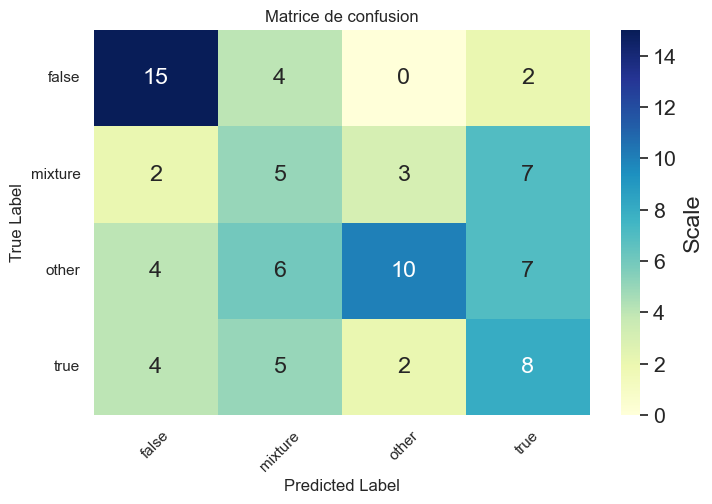

In [26]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint4/SentimentModel_Sprint4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [12]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
réalisé en  334.198 s
Meilleur résultat : 0.520
Ensemble des meilleurs paramètres :
	rfc__max_depth: 25
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 15
	rfc__n_estimators: 1200

Les premiers résultats : 
     rfc__max_depth  rfc__min_samples_leaf  rfc__min_samples_split  \
19              30                      2                       5   
11              25                      2                      15   
13              30                      1                       5   
9               25                      2                      10   
1               25                      1                       5   

    rfc__n_estimators  accuracy  
19               1200  0.520238  
11               1200  0.52

In [13]:
ajustRFC(X_train, y_train,[1200],[30,25],[5,15],[1,2])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [1200], 'rfc__max_depth': [30, 25], 'rfc__min_samples_split': [5, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 128 candidates, totalling 640 fits
réalisé en  2094.598 s
Meilleur résultat : 0.530
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 5
	rfc__n_estimators: 1200
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
51                       True                 False              25   
49                       True                 False              25   
35                       True      

Sauvegarde du modèle dans  ./Modele/Sprint4/RandomForestClassifier_Sprint4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=5,
                                        n_estimators=1200))])
Accuracy : 0.607
Classification Report
              precision    recall  f1-score   support

       false    0.70833   0.80952   0.75556        21
     mixture    0.38889   0.43750   0.41176        16
       other    0.76190   0.51613   0.61538        31
        true    0.52381   0.68750   0.59459        16

    accuracy                        0.60714        84
   macro avg    0.59573   0.61266   0.59432        84
weighted avg    0.63211   0.60714   0.60768        84



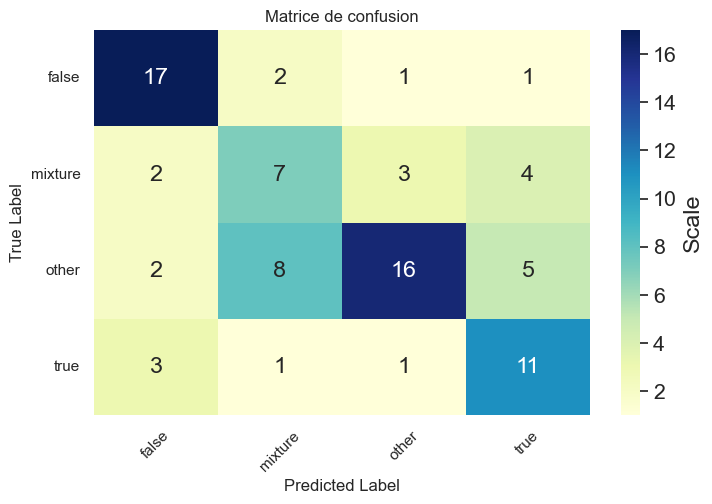

In [14]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=5, n_estimators=1200))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint4/RandomForestClassifier_Sprint4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Le dernier modele

In [15]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  53.793 s
Meilleur résultat : 0.530
Ensemble des meilleurs paramètres :
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'liblinear'

Les premiers résultats : 
    lr__C lr__penalty lr__solver  accuracy
2  100.0          l2  liblinear  0.529762
0  100.0          l2  newton-cg  0.527381
1  100.0          l2      lbfgs  0.527381
5   10.0          l2  liblinear  0.522619
6    1.0          l2  newton-cg  0.519048


In [16]:
ajustLR(X_train, y_train,['liblinear'],['l2'],[100])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  69.508 s
Meilleur résultat : 0.530
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
13                      False                 False    100          l2   
9                       False                  True    100          l2   
15                      False                 False    100          l2   
11                      False                  True    1

Sauvegarde du modèle dans  ./Modele/Sprint4/LogisticRegression_Sprint4.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=100, solver='liblinear'))])
Accuracy : 0.607
Classification Report
              precision    recall  f1-score   support

       false    0.70833   0.80952   0.75556        21
     mixture    0.47619   0.62500   0.54054        16
       other    0.78261   0.58065   0.66667        31
        true    0.37500   0.37500   0.37500        16

    accuracy                        0.60714        84
   macro avg    0.58553   0.59754   0.58444        84
weighted avg    0.62803   0.60714   0.60931        84



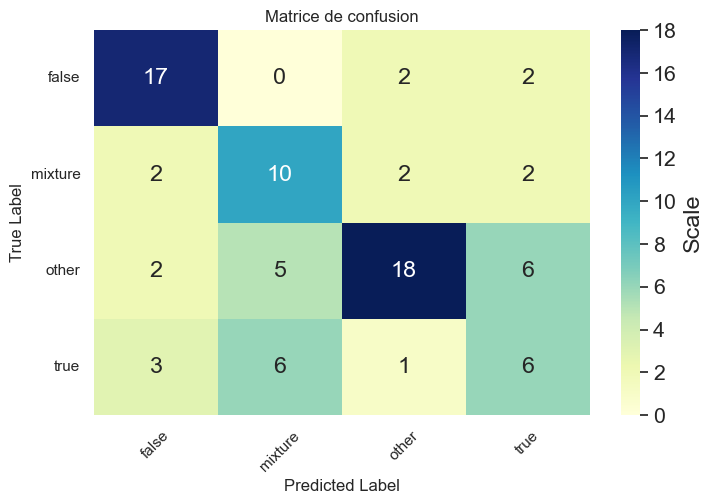

In [17]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint4/LogisticRegression_Sprint4.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)